In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
bench = BenchmarkSet("rbv2_svm", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

Please make sure to also cite:
Binder M., Pfisterer F. & Bischl B. (2020). Collecting Empirical Data About Hyperparameters for Data Driven AutoML. 7th ICML Workshop on Automated Machine Learning.


In [4]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [9]:
def plot_true_lc(ccs, target):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target],
                 color = colors[i], marker = "o", linestyle="None", alpha=0.5)

In [14]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

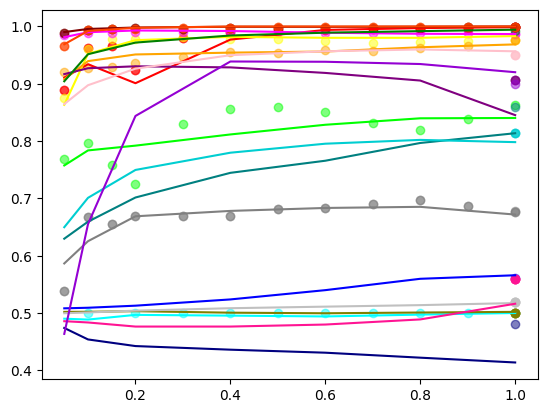

In [32]:
# Draw a sample configuration
ccs = [df.sample(1).to_dict() for i in range(20)]
target = "auc"
#target = "val_balanced_accuracy"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
#fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [33]:
ccs

[{'task_id': {2045069: 1468},
  'kernel': {2045069: 'linear'},
  'shrinking': {2045069: False},
  'num.impute.selected.cpo': {2045069: 'impute.mean'},
  'repl': {2045069: 5},
  'cost': {2045069: 0.000470876},
  'gamma': {2045069: nan},
  'tolerance': {2045069: 0.00417819},
  'degree': {2045069: nan},
  'trainsize': {2045069: 0.7},
  'acc': {2045069: 0.94},
  'bac': {2045069: 0.93978673},
  'auc': {2045069: 0.9954507},
  'brier': {2045069: 0.12774731},
  'logloss': {2045069: 0.2921655},
  'timetrain': {2045069: 5.446},
  'timepredict': {2045069: 0.532}},
 {'task_id': {1997593: 1487},
  'kernel': {1997593: 'polynomial'},
  'shrinking': {1997593: True},
  'num.impute.selected.cpo': {1997593: 'impute.hist'},
  'repl': {1997593: 7},
  'cost': {1997593: 1.37428},
  'gamma': {1997593: nan},
  'tolerance': {1997593: 0.022337},
  'degree': {1997593: 5.0},
  'trainsize': {1997593: 0.05},
  'acc': {1997593: 0.93636364},
  'bac': {1997593: 0.49977943},
  'auc': {1997593: 0.7688085},
  'brier': {19

In [34]:
bench = BenchmarkSet("rbv2_svm", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "auc"

Please make sure to also cite:
Binder M., Pfisterer F. & Bischl B. (2020). Collecting Empirical Data About Hyperparameters for Data Driven AutoML. 7th ICML Workshop on Automated Machine Learning.
False
/home/lps/Phd/yahpo_data/rbv2_svm/model_v2.onnx


In [35]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
   
    for i in range(len(colors)):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

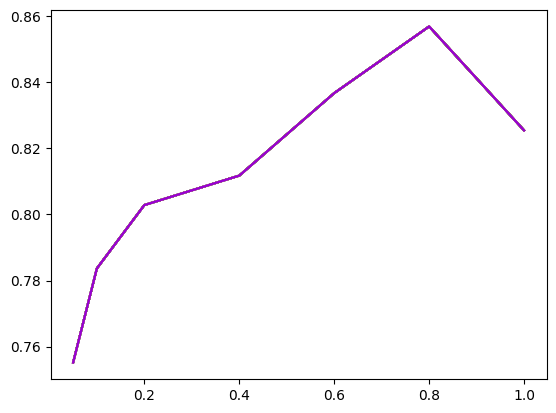

In [36]:
plot_lc_noisy(ccs[1], target, fidelity_sequence)

In [37]:
bench = BenchmarkSet("rbv2_svm", active_session=False, check=False, noisy=True)
bench._get_model_path()

Please make sure to also cite:
Binder M., Pfisterer F. & Bischl B. (2020). Collecting Empirical Data About Hyperparameters for Data Driven AutoML. 7th ICML Workshop on Automated Machine Learning.


'/home/lps/Phd/yahpo_data/rbv2_svm/model_v2_noisy.onnx'

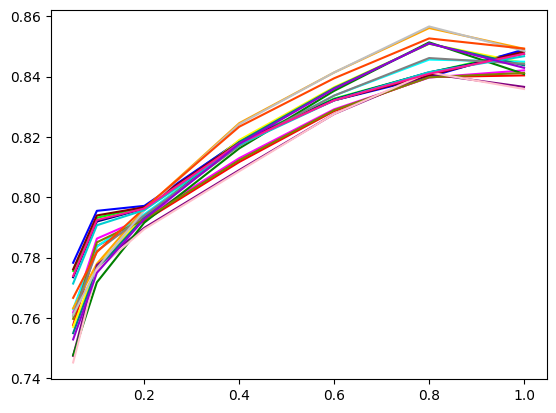

In [38]:
plot_lc_noisy(ccs[1], target, fidelity_sequence)